In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Power BI\Online Sales Coupon Analysis\online_sales_coupon_data.csv')

In [8]:
df.head()

,Customer_ID,Product_Category,Product_Name,Sale_Amount,Discount_Percentage,Final_Price,Purchase_Date,Year,Month
0,25795,Toys,Lego Set,329.15,10,296.24,2022-10-03 19:53:08.891772640,2022,10
1,10860,Clothing,T-Shirt,85.50,30,59.85,2023-02-12 02:02:57.524007264,2023,2
2,86820,Beauty,Foundation,326.80,20,261.44,2020-10-02 03:30:02.335842200,2020,10
3,64886,Beauty,Face Cream,99.50,10,89.55,2020-10-24 20:15:56.760965480,2020,10
4,16265,Beauty,Foundation,377.76,15,321.10,2021-04-02 17:18:25.320529456,2021,4


In [9]:
df.describe()

,Customer_ID,Sale_Amount,Discount_Percentage,Final_Price,Year,Month
count,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000,7707.000000
mean,54628.414818,256.163353,21.042559,202.202916,2021.610743,6.337485
std,26197.463778,141.824090,12.221452,117.621338,1.199221,3.556215
min,10055.000000,10.080000,5.000000,5.600000,2020.000000,1.000000
25%,32140.000000,133.400000,15.000000,101.375000,2021.000000,3.000000
50%,54264.000000,257.010000,20.000000,195.920000,2022.000000,6.000000
75%,77567.500000,380.220000,25.000000,298.630000,2023.000000,9.000000
max,99963.000000,499.960000,50.000000,473.930000,2024.000000,12.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          7707 non-null   int64  
 1   Product_Category     7707 non-null   object 
 2   Product_Name         7707 non-null   object 
 3   Sale_Amount          7707 non-null   float64
 4   Discount_Percentage  7707 non-null   int64  
 5   Final_Price          7707 non-null   float64
 6   Purchase_Date        7707 non-null   object 
 7   Year                 7707 non-null   int64  
 8   Month                7707 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 542.0+ KB


In [11]:
df.isnull().sum()

Customer_ID            0
Product_Category       0
Product_Name           0
Sale_Amount            0
Discount_Percentage    0
Final_Price            0
Purchase_Date          0
Year                   0
Month                  0
dtype: int64

In [12]:
df.sort_values(by='Sale_Amount',ascending=False)

,Customer_ID,Product_Category,Product_Name,Sale_Amount,Discount_Percentage,Final_Price,Purchase_Date,Year,Month
4865,67124,Beauty,Face Cream,499.96,10,449.96,2021-10-10 18:48:29.525045416,2021,10
4217,11988,Beauty,Lipstick,499.90,15,424.92,2023-05-24 17:38:58.645211520,2023,5
196,48623,Home Appliances,Air Conditioner,499.84,30,349.89,2021-01-28 09:00:58.863223460,2021,1
4392,59393,Toys,Puzzle,499.73,15,424.77,2022-02-22 09:30:07.941863480,2022,2
746,27100,Electronics,Tablet,499.67,50,249.84,2021-06-07 20:13:53.428497272,2021,6
...,...,...,...,...,...,...,...,...,...
4517,24671,Electronics,Laptop,10.27,15,8.73,2021-08-04 01:59:13.283155984,2021,8
5248,93639,Groceries,Olive Oil,10.16,5,9.65,2022-05-07 09:54:36.719439392,2022,5
4961,23900,Toys,Board Game,10.15,5,9.64,2022-12-29 01:59:35.707241104,2022,12
5807,65734,Electronics,Laptop,10.12,20,8.10,2021-01-15 22:34:47.308590708,2021,1


In [13]:
# Customer engagement rise per product
top_products = df.groupby('Product_Name')['Sale_Amount'].sum().sort_values(ascending=False)
print("Customer engagement by product:")
print(top_products.head())

Customer engagement by product:
Product_Name
Shampoo       74165.65
Sneakers      70189.99
Sweater       69993.88
Jeans         69322.48
Smartphone    68830.68
Name: Sale_Amount, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_21452\2578106484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index[:10], y=top_products.values[:10], palette='rainbow')


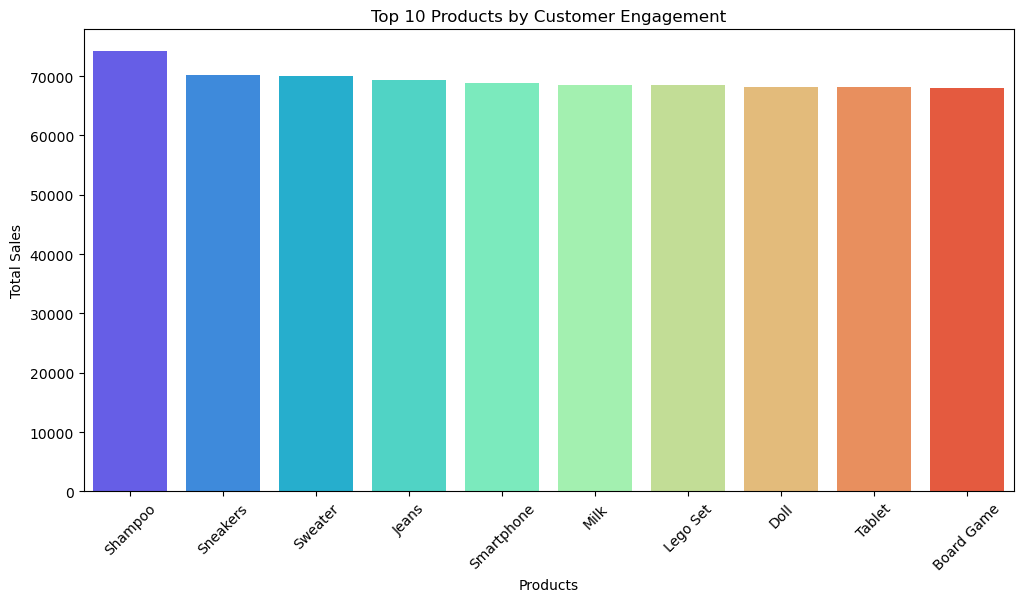

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index[:10], y=top_products.values[:10], palette='rainbow')
plt.xlabel("Products")
plt.ylabel("Total Sales")
plt.title("Top 10 Products by Customer Engagement")
plt.xticks(rotation=45)
plt.show()
#plt.savefig('Customers Engagement per Product.png')

In [15]:
# Product-wise classification of sales
product_sales=df.groupby('Product_Category')['Sale_Amount'].sum().sort_values(ascending=False)
print('Product-wise classification of sales')
print(product_sales)

Product-wise classification of sales
Product_Category
Electronics        336249.07
Beauty             333753.58
Clothing           332890.01
Home Appliances    328662.62
Groceries          321471.74
Toys               321223.94
Name: Sale_Amount, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_21452\3283505376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index[:10],y=product_sales.values[:10],palette='BuPu')


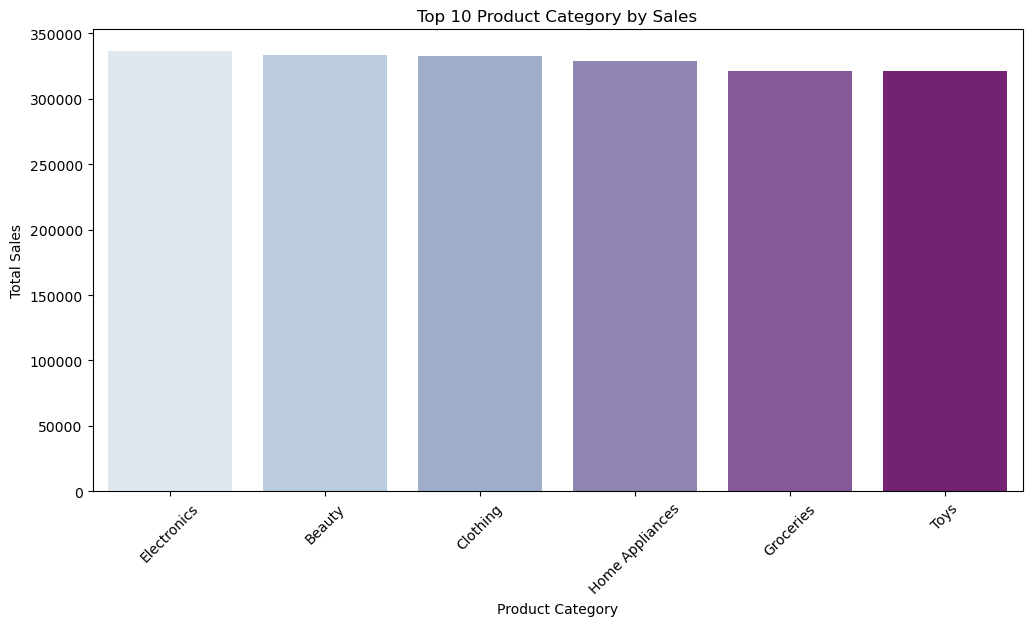

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.index[:10],y=product_sales.values[:10],palette='BuPu')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Product Category by Sales')
plt.xticks(rotation=45)
plt.show()
#plt.savefig('Product-wise Classification of Sales Amount.png')

In [17]:
#Coupon Based on Discount
def coupon(discount):
    if discount == 0:
        return 'No Coupon'
    elif 1<=discount<=10:
        return 'Flat Discount'
    elif 11<=discount<=40:
        return 'Percentage Based Discount'
    else:
        return'Buy 1 Get 1 Free'
df['Coupon Type']=df['Discount_Percentage'].apply(coupon)

<Figure size 1000x600 with 0 Axes>

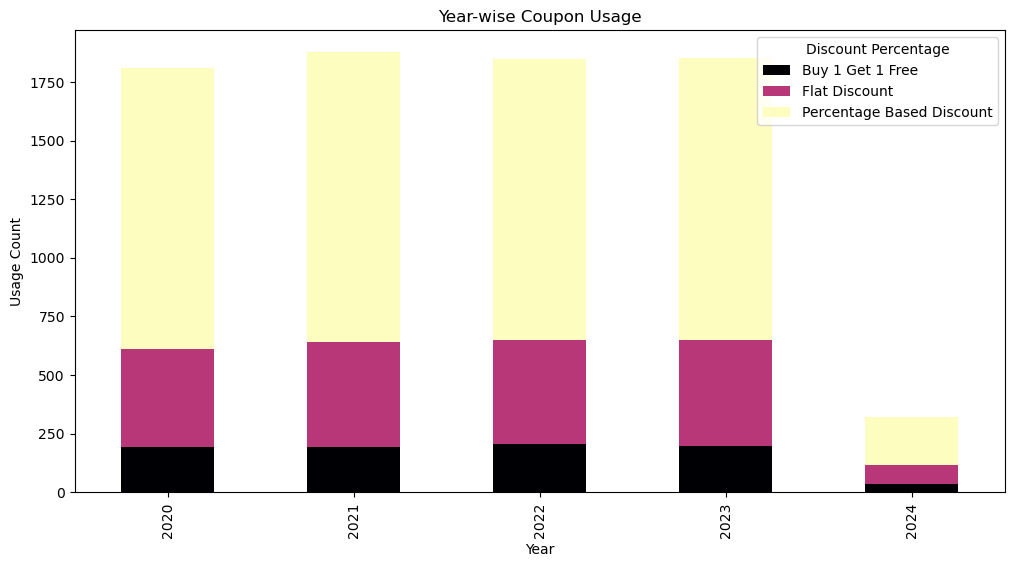

<Figure size 640x480 with 0 Axes>

In [56]:
# Year-wise most used coupons

coupon_usage = df.groupby(['Year', 'Coupon Type']).size().unstack()
plt.figure(figsize=(10, 6))
coupon_usage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')
plt.xlabel("Year")
plt.ylabel("Usage Count")
plt.title("Year-wise Coupon Usage")
plt.legend(title="Discount Percentage")
plt.show()
#plt.savefig('Year-wise most used Coupons.png')


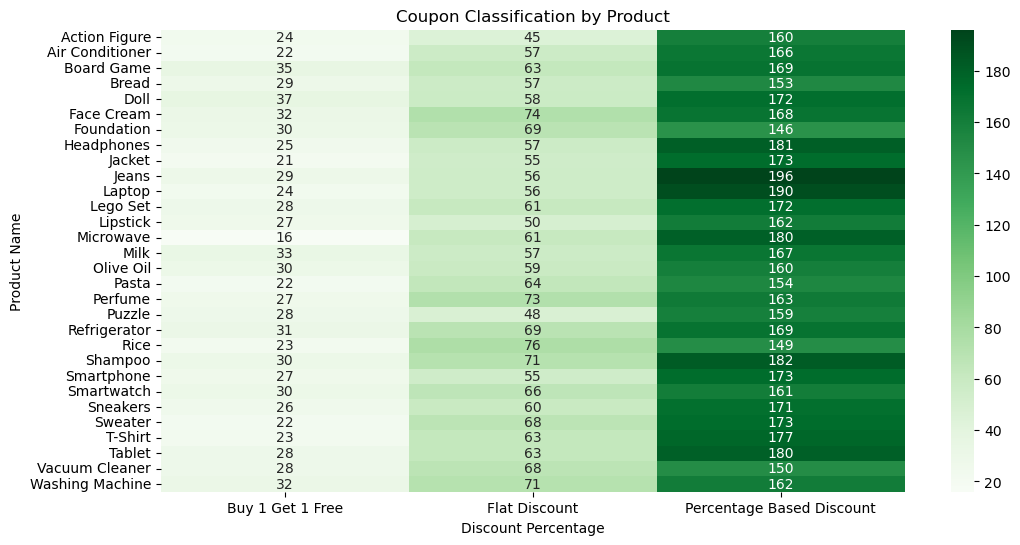

<Figure size 640x480 with 0 Axes>

In [68]:
# Coupon classification by product

Coupon_Product=df.groupby('Product_Name')['Coupon Type'].value_counts().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(Coupon_Product, cmap='Greens', annot=True, fmt='.0f')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.title('Coupon Classification by Product')
plt.show()
#plt.savefig('Coupon Classification by Product.png')


C:\Users\HP\AppData\Local\Temp\ipykernel_21452\2990402307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Monthly_Sales.index, y=Monthly_Sales.values, palette='plasma')


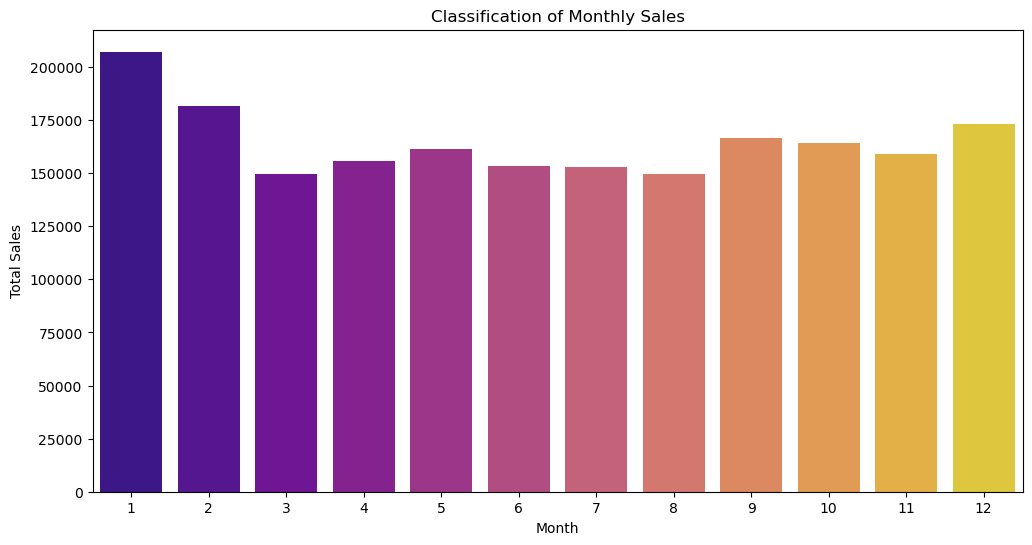

<Figure size 640x480 with 0 Axes>

In [74]:
# Month-Wise Classification of Sales

Monthly_Sales=df.groupby('Month')['Sale_Amount'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=Monthly_Sales.index, y=Monthly_Sales.values, palette='plasma')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Classification of Monthly Sales')
plt.show()

#plt.savefig('Month-Wise Classification of Sales.png')